<a href="https://colab.research.google.com/github/mervenurerdogan/LungCancerCustomModel2/blob/main/Xresnext_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 719 kB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 30.5 MB/s 
     |████████████████████████████████| 197 kB 48.4 MB/s 
     |████████████████████████████████| 4.2 MB 33.8 MB/s 
     |████████████████████████████████| 346 kB 53.0 MB/s 
     |████████████████████████████████| 59 kB 7.2 MB/s 
     |████████████████████████████████| 212 kB 50.3 MB/s 
     |████████████████████████████████| 1.1 MB 40.5 MB/s 
     |████████████████████████████████| 140 kB 52.1 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 127 kB 53.6 MB/s 
     |████████████████████████████████| 271 kB 49.6 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
     |████████████████████████████████| 144 kB 40.5 MB/s 
     |████████████████████████████████| 596 kB 49.1 MB/s 
     |████████████████████████████████| 6.6 MB 35.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the p

In [2]:
from fastbook import *

In [3]:
from fastai.vision.all import *


In [4]:
path=Path('/content/gdrive/MyDrive/BINARY')

In [5]:
train_fnames = get_image_files(path)


In [6]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=RandomSplitter(valid_pct=0.25,seed=41),
                 get_y=parent_label,
                 item_tfms=Resize(512,method='squish'),
                 batch_tfms=[*aug_transforms(size=256, max_warp=0), Normalize.from_stats(*imagenet_stats)]
                 
                 
)

In [7]:
dls=dblock.dataloaders(train_fnames)

In [8]:
dls.c,len(dls.train_ds),len(dls.valid_ds)

(2, 510, 170)

In [9]:
dls.vocab

['CANCER', 'NORMAL']

In [12]:
learn=cnn_learner(dls,xse_resnext18_deeper, pretrained=True,metrics=accuracy)


/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [13]:
print(learn.summary())

Sequential (Input shape: 64 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 32 x 128 x 128 
Conv2d                                    864        False     
BatchNorm2d                               64         True      
ReLU                                                           
Conv2d                                    9216       False     
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 128 x 128 
Conv2d                                    18432      False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 64 x 64   
MaxPool2d                          

SuggestedLRs(valley=0.0008317637839354575)

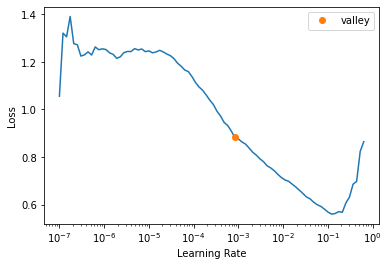

In [14]:
learn.lr_find()

In [15]:
learn.fit_one_cycle(30,lr_max=1e-3)


epoch,train_loss,valid_loss,accuracy,time
0,1.054032,0.826536,0.352941,00:19
1,0.802810,0.432899,0.935294,00:12
2,0.623586,0.152872,0.958824,00:12
3,0.523841,0.154690,0.941176,00:12
4,0.455112,0.185140,0.935294,00:12
5,0.400450,0.180968,0.947059,00:12
6,0.350150,0.176710,0.958824,00:12
7,0.325346,0.123589,0.958824,00:12
8,0.299814,0.110006,0.958824,00:12
9,0.274247,0.123240,0.958824,00:12


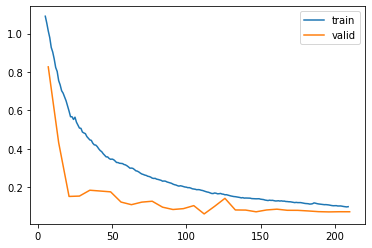

In [16]:
learn.recorder.plot_loss()

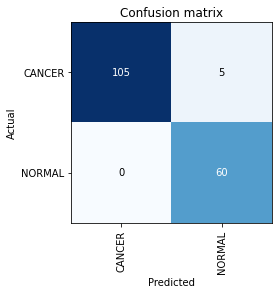

In [17]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [18]:
print("Number of examples in testing:", len(dls.valid_ds))

Number of examples in testing: 170


In [19]:
preds, targs = learn.tta()
accuracy(preds, targs).item()

0.9647058844566345

In [20]:
interp.most_confused()

[('CANCER', 'NORMAL', 5)]

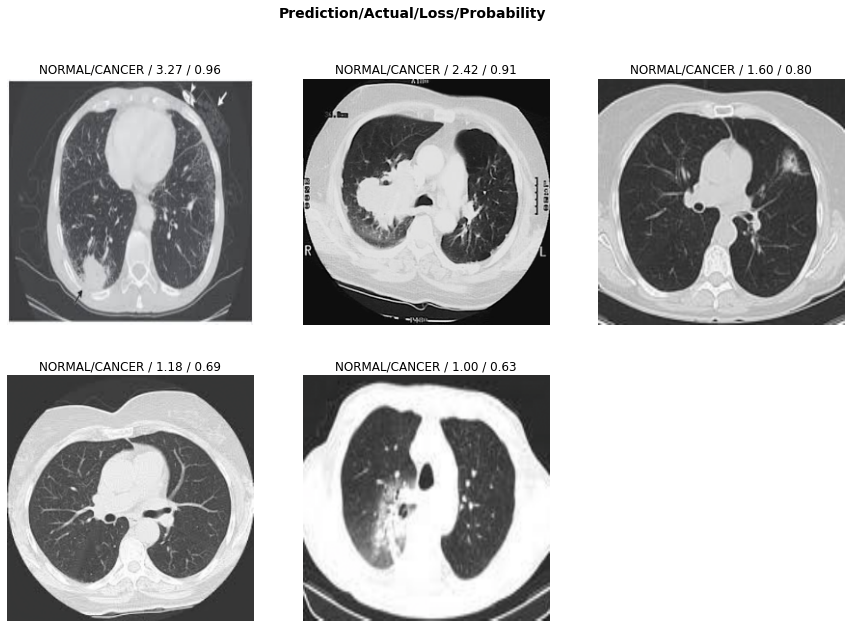

In [22]:
interp.plot_top_losses(5, figsize=(15,10))

In [23]:
interp.print_classification_report()

              precision    recall  f1-score   support

      CANCER       1.00      0.95      0.98       110
      NORMAL       0.92      1.00      0.96        60

    accuracy                           0.97       170
   macro avg       0.96      0.98      0.97       170
weighted avg       0.97      0.97      0.97       170



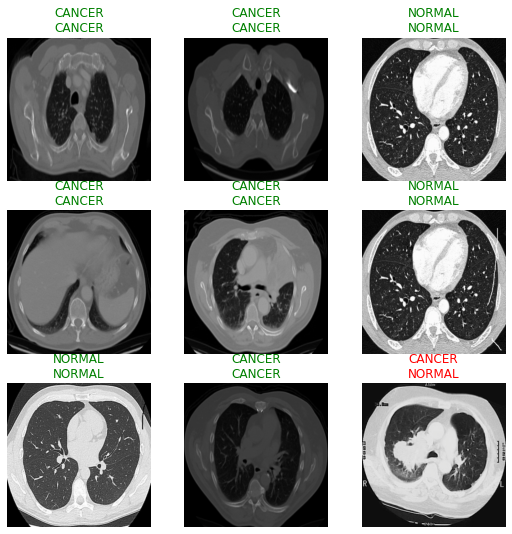

In [26]:
learn.show_results()

In [28]:
losses,idxs = interp.top_losses(5)
print(idxs)

TensorBase([ 17, 110,  27,  46,   9])


In [29]:
dls.valid_ds.items[110]

Path('/content/gdrive/MyDrive/BINARY/CANCER/CANCER (291).png')

In [30]:
dls.valid_ds.items[17]

Path('/content/gdrive/MyDrive/BINARY/CANCER/CANCER (460).png')

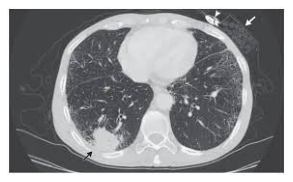

In [31]:
img = PILImage.create('/content/gdrive/MyDrive/BINARY/CANCER/CANCER (460).png')
img.show()

In [32]:
is_cancer,_,probs = learn.predict(img)
print(f"Is this a CANCER?: {is_cancer}")
print(f"Probability it's a CANCER: {probs[0].item():.2f}")

Is this a CANCER?: NORMAL
Probability it's a CANCER: 0.04


In [33]:
learn.predict(img)

('NORMAL', TensorBase(1), TensorBase([0.0379, 0.9621]))

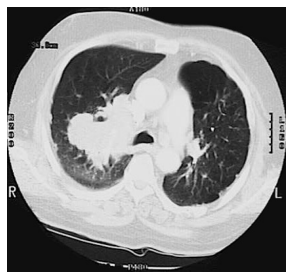

In [35]:
img2 = PILImage.create('/content/gdrive/MyDrive/BINARY/CANCER/CANCER (291).png')
img2.show()

In [36]:
is_cancer,_,probs = learn.predict(img2)
print(f"Is this a CANCER?: {is_cancer}")
print(f"Probability it's a CANCER: {probs[0].item():.2f}")

Is this a CANCER?: NORMAL
Probability it's a CANCER: 0.09


In [37]:
learn.predict(img2)

('NORMAL', TensorBase(1), TensorBase([0.0888, 0.9112]))

In [38]:
btn=widgets.FileUpload() 
btn

FileUpload(value={}, description='Upload')

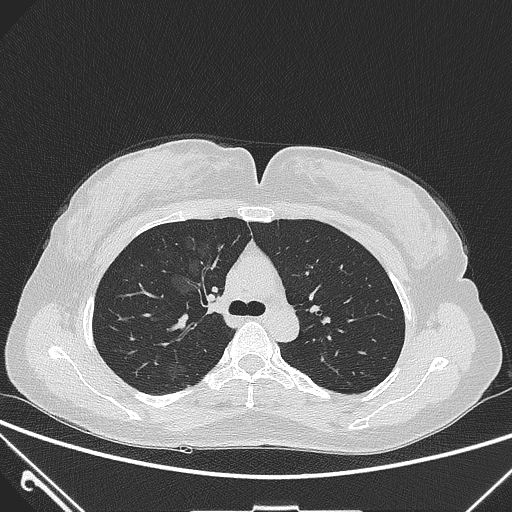

In [42]:
img_out=PILImage.create(btn.data[-1])
img_out

In [43]:
is_cancer,_,probs = learn.predict(img_out)
print(f"Is this a CANCER?: {is_cancer}")
print(f"Probability it's a CANCER: {probs[0].item():.2f}")

Is this a CANCER?: NORMAL
Probability it's a CANCER: 0.00


In [44]:
learn.predict(img_out)

('NORMAL', TensorBase(1), TensorBase([3.7740e-06, 1.0000e+00]))